## Lecture 08
## Optimization in Python 
### March 24, 2020  

In [1]:
from scipy import optimize

In [2]:
!pip install cvxopt

import cvxopt

     |████████████████████████████████| 3.1 MB 1.9 MB/s eta 0:00:01     |█▏                              | 112 kB 1.9 MB/s eta 0:00:02


In [3]:
# https://www.sympy.org/en/index.html
    
!pip install sympy

     |████████████████████████████████| 5.6 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 512 kB 11.7 MB/s eta 0:00:01
  Created wheel for mpmath: filename=mpmath-1.1.0-py3-none-any.whl size=532239 sha256=d7a7a8e3d919e65c7262df4aa67b06c13b4ff69e795ad924d02a6a4ea95623d3
  Stored in directory: /Users/yunya/Library/Caches/pip/wheels/e2/46/78/e78f76c356bca9277368f1f97a31b37a8cb937176d9511af31
Successfully built mpmath


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

#for best printing 
sympy.init_printing()

### Optimization

- In general, optimization is the process of finding and selecting the optimal element
from a set of feasible candidates.


- A universally important mathematical tool, it has been developed and adopted for use in many fields of science and engineering.


- Terminology: for example, the mathematical function that is optimized may be called a cost function, loss function, energy function, or objective function, to mention a few. Here we use the generic term “objective function.”


- Optimization is closely related to equation solving because at an optimal value of a function, its derivative, or gradient in the multivariate case, is zero. 


- The converse, however, is not necessarily true, but a method to solve optimization problems is to solve for the zeros of the derivative or the gradient and test the resulting candidates for optimality. This approach is not always feasible though, and often it is required to take other numerical approaches, many of which are closely related to the numerical methods for root finding.


- We discuss modules: **SciPy** for nonlinear optimization problems, and **cvxopt** for convex optimization problems (here an example of a linear programming problem).


Optimization problem: 
---

Consider an objective (function) $f(x): \mathbf{R}^n \to \mathbf{R}$ 
and constraints (functions) $g_i(x), h_j(x) : \mathbf{R}^n \to \mathbf{R}$. Consider:

$$\min f(x)$$
$$s.t.$$
$$g_i(x) = 0 \quad i=1,\dots, m$$
$$h_j(x) \leq 0 \quad i=1,\dots, p$$.





This form is general, since a maximization problem can be cast as a minimization problem:
$$\max f(x) \equiv \min -f(x).$$

---

- A general mathematical optimization on this form is difficult to solve, and there are no efficient methods for solving completely generic optimization
problems. 

- There are efficient methods for many important special cases, and it is
therefore important to know as much as possible about the objective functions and the constraints in order to be able to solve a problem.

---

- The problem is univariate or one dimensional if $x$ is a scalar, and multivariate or multidimensional if $x$ is a vector. 


- For high-dimensional objective functions with larger $n$ (where $x \in \mathbf{R}^n$), the optimization problem is harder and more computationally demanding to solve. 


- If the objective function $f$ and the constraints $g_i, h_j$ all are linear, the problem is a linear optimization problem, or linear programming problem. 


- If either the objective function or the constraints are nonlinear, it is a nonlinear optimization problem, or
nonlinear programming problem. 


- Finally, handling equality and inequality constraints require different approaches.

---

- As usual, nonlinear problems are much harder to solve than linear problems, because they have a
wider variety of possible behaviors. 


- A general nonlinear problem can have both local and global minima,
which turns out to make it very difficult to find the global minima



- Iterative solvers may often converge to
local minima rather that the global minima, or may even fail to converge altogether if there are both local
and global minima. 




### Optimization of continuous and smooth functions

- Optimization of continuous and smooth functions are closely related to nonlinear equation solving,
because extremal values of a function $f (x)$ correspond to points where its **derivative**, or **gradient** , is zero, i.e. $$f'(x) = 0$$ or $$\nabla f(x) = 0,$$ respectively.



- Here $\nabla f(x) = \left(\partial f(x) / \partial x_0, \dots, \partial f(x) / \partial x_{n - 1}\right)^T$.



- Finding candidates for the optimal value is equivalent to solving (in general nonlinear) equations. 


- A solution, (a **stationary point**), does not necessarily correspond to a minimum of $f(x)$.



- It can also be maximum or a saddle point! https://en.wikipedia.org/wiki/Saddle_point


- Candidates should therefore be tested for optimality; for unconstrained objective functions, we test the higher-order derivatives $f^{(k)}(x)$, or the Hessian matrix 

$$\Big\{ \frac{\partial^2 f(x)}{\partial x_i \partial x_j} \Big\}_{i,j}$$


- However, an important subclass of nonlinear problems that can be solved efficiently are (strictly) **convex problems**, which are directly related to the absence of strictly local minima and the existence of a **unique global minimum**.

**Some examples**

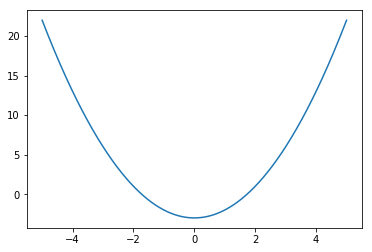

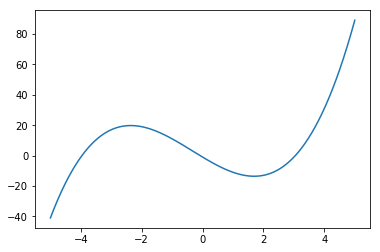

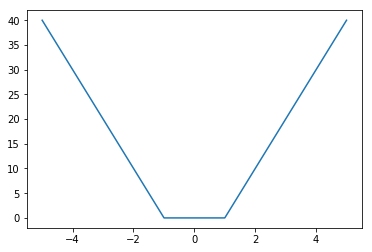

In [5]:
import math 

f1 = lambda x : x ** 2 - 3
f2 = lambda x : x ** 3 + x ** 2 - 12 * x - 1
f3 = lambda x : 10 * (abs(x) - 1) * (abs(x) > 1)

x = np.linspace(- 5, 5, 1000)

plt.plot(x, f1(x))
plt.show()

plt.plot(x, f2(x))
plt.show()

plt.plot(x, f3(x))
plt.show()



- Newton’s method for root finding is an example of a quadratic approximation method that can be applied to find a function minimum: https://en.wikipedia.org/wiki/Newton%27s_method

$$x' = x - f(x) / f'(x) \,.$$



- By applying the method to the derivative rather than the function itself: https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization




- The method can converge quickly if started close to an optimal point, but may not converge at all 
if started too far from the optimal value!

---

This formula also requires evaluating both the derivative and the second-order derivative in each iteration.

**Example**
---
Minimize the area of a cylinder with unit volume.


$$f ( [ r , h ] ) := 2 \pi r^2 + 2 \pi rh$$
subject to the equality constraint
$$g ( [ r , h ] ) := r^2 \pi h - 1 = 0$$


---

We use Sympy: 

[https://www.sympy.org/en/index.html](https://www.sympy.org/en/index.html)


In [53]:
a,b = sympy.symbols("a,b")

In [55]:
test = a+b**2
sympy.solve(test)
#always substitude the one with lower rank

In [40]:
r, h = sympy.symbols("r, h")
Area = 2 * sympy.pi * r ** 2 + 2 * sympy.pi * r * h
Volume = sympy.pi * r ** 2 * h
print('Area',Area)
print('Volume',Volume)

Area 2*pi*h*r + 2*pi*r**2
Volume pi*h*r**2


In [41]:
h_r = sympy.solve(Volume - 1)[0]
print(sympy.solve(Volume - 1),'\n',h_r)
# h_r = h(r) a function of r
# solve equation Volume-1=0

[{h: 1/(pi*r**2)}] 
 {h: 1/(pi*r**2)}


In [43]:
print(Area)
Area_r = Area.subs(h_r) 
#substitude all h in the formula with r constraint
#h = 1/(pi*r**2)
print(Area_r)

2*pi*h*r + 2*pi*r**2
2*pi*r**2 + 2/r


In [ ]:
# solve in r, solve first order differential =0
rsol = sympy.solve(Area_r.diff(r))[0]

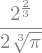

In [8]:
rsol

In [9]:
_.evalf()
#print out the number

Verify that the second derivative is positive, and so that rsol corresponds to a minimum:

In [56]:
Area_r.diff(r, 2).subs(r, rsol) 
#second order derivative, 
# substitude with rsol

In [57]:
_.evalf()

In [58]:
Area_r.subs(r, rsol)

In [59]:
_.evalf()

---

- Typically (for more practical problems) one needs to apply numerical techniques. 

- To solve the problem by using SciPy’s numerical optimization functions.

- First define a Python function that implements the objective function. 

- To solve the optimization problem, use e.g. **optimize.brent**. 


[https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brent.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brent.html)

In [60]:
# numerical solving
# by using that the optimal h(r) = 1/(pi * r ** 2)
# the get the Area_r as f(r)

def f(r):
    return 2 * np.pi * r**2 + 2 / r

- When possible, it is a good idea to visualize the objective function before attempting a numerical optimization

- It can help identifying a suitable initial interval for the numerical optimization routine.

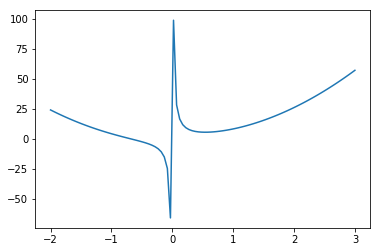

In [61]:
r = np.linspace(-2, 3, 100)
plt.plot(r, f(r))

In [62]:
# numerical solving
# by using that the optimal h(r) = 1/(pi * r ** 2)
def f(r):
    return 2 * np.pi * r**2 + 2 / r

r_min = optimize.brent(f, brack=(0.1, 3))
#bracktuple, optional
#Either a triple (xa,xb,xc) where xa<xb<xc and func(xb) < func(xa), 
#func(xc) or a pair (xa,xb) which are used as a starting interval for a downhill bracket search (see bracket). 
#Providing the pair (xa,xb) does not always mean the obtained solution will satisfy xa<=x<=xb.

print("rmin:", r_min)
print("f(rmin):", f(r_min))

rmin: -5.878533326985533e-12
f(rmin): -340220917149.34357


---

We can also use: **optimize.minimize_scalarr**
    
[https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html)

In [25]:
#Minimization of scalar function of one variable
optimize.minimize_scalar(f, bracket=(0.1, 5)) 

     fun: 5.535810445932086
    nfev: 17
     nit: 13
 success: True
       x: 0.5419260648976671

In [57]:
optimize.minimize_scalar(f, bounds=(0.1, 5), method="bounded")

     fun: 5.535810445969933
 message: 'Solution found.'
    nfev: 14
  status: 0
 success: True
       x: 0.541924653160397

### Unconstrained Multivariate Optimization


---
Multivariate optimization is significantly harder than the univariate optimization discussed in the previous
section.

---

- In particular, the analytical approach of solving the nonlinear equations for roots of the gradient is rarely feasible in the multivariate case. 

- Instead we must resort to techniques that start at some point in the coordinate space and use different strategies to move toward a better approximation of the minimum point. 

- However, close to a minimum it converges quickly. As usual there is a trade-off between convergence rate and stability. 

- As it is formulated here, Newton’s method requires both the gradient and the Hessian of the function.


### Steepest Descent
---


As minimization strategy, it is therefore sensible to move along this direction for some
distance $\alpha_k$, and then iterate this scheme at the new point. 

This method is known as the steepest descent method, and it gives the iteration formula:

$$x_{k + 1} := x_k − \alpha_k \nabla f(x_k)$$

### Newton’s method
----

Newton’s method for multivariate optimization is a modification of the steepest descent method that
can improve convergence.

The sequence of points $x_k$ for $k \geq 0$ is:

$$x_{k + 1} := x_k − H^{-1} (x_k) \nabla f(x_k)$$

where the Hessian matrix is given by:

$$H(u) = \left\{ \frac{\partial^2 f(u)}{\partial u_i \partial u_j} \right\}_{i,j=1}^n$$

and $u = (u_1, u_2, \dots, u_n)$.


### Newton’s method - implementation 
---

In SciPy, Newton’s method is implemented in the function **optimize.fmin_ncg**. This function takes the
following arguments: a Python function for the objective function, a starting point, a Python function for
evaluating the gradient, and (optionally) a Python function for evaluating the Hessian.

---
**Example**

Consider the following problem: $$\min_x f ( x )$$ where
the objective function is $$f ( x ) = ( x_1 - 1 )^4 + 5 ( x_2 - 1 )^2 - 2 x_1 x_2.$$ 




---

- To apply Newton’s method, we need to calculate
the gradient and the Hessian. 

- For this particular case, this can easily be done by hand. 



---

For the sake of generality, we use **SymPy** to compute **symbolic expressions** for the **gradient** and the **Hessian**:

- define symbols and symbolic expressions for the objective function;

- use the **sympy.diff** function for each variable to obtain the gradient and Hessian in symbolic form:

In [66]:
x1, x2 = sympy.symbols("x_1, x_2")

f_sym = (x1 - 1) ** 4 + 5 * (x2 - 1) ** 2 - 2 * x1 * x2

fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]

In [67]:
f_sym

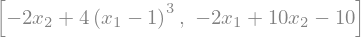

In [68]:
fprime_sym #gradient

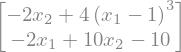

In [69]:
# a vector (matrix) form of the gradient
sympy.Matrix(fprime_sym)

In [70]:
# Hessian (analogous to the second derivative of a univariate function):
fhessian_sym = [[f_sym.diff(u, v) for u in (x1, x2)] for v in (x1, x2)]

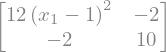

In [71]:
sympy.Matrix(fhessian_sym) #hessian matrix

---

With symbolic expressions for the gradient and the Hessian, we can create vectorized functions for these by using **sympy.lambdify**. 

**Lambdify**
transforms sympy expressions to lambda functions which can be used to calculate numerical values very fast.

[https://docs.sympy.org/latest/modules/utilities/lambdify.html](https://docs.sympy.org/latest/modules/utilities/lambdify.html)

In [72]:
f_lambda = sympy.lambdify((x1, x2), f_sym, 'numpy')

fprime_lambda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')

fhessian_lambda = sympy.lambdify((x1, x2), fhessian_sym, 'numpy')

In [73]:
f_lambda

<function _lambdifygenerated(x_1, x_2)>

---

- However, the functions produced by sympy.lambdify take one argument for each variable in the
corresponding expression.

- To obtain functions compatible with the SciPy optimization routines, we wrap each of the functions generated by sympy.lambdify with a Python function.

In [74]:
def func_to_vector(f):
    """
    Wrapper for f(X) -> f(X[0], X[1])
    """
    return lambda x: np.array(f(x[0], x[1]))

f = func_to_vector(f_lambda)
fprime = func_to_vector(fprime_lambda)
fhess = func_to_vector(fhessian_lambda)


In [75]:
f

<function __main__.func_to_vector.<locals>.<lambda>(x)>

Newton optimization routine
---

In SciPy, Newton’s method is implemented in the function **optimize.fmin_ncg**.


In [77]:
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 17
         Hessian evaluations: 8


In [78]:
print(x_opt)

[1.88292613 1.37658523]


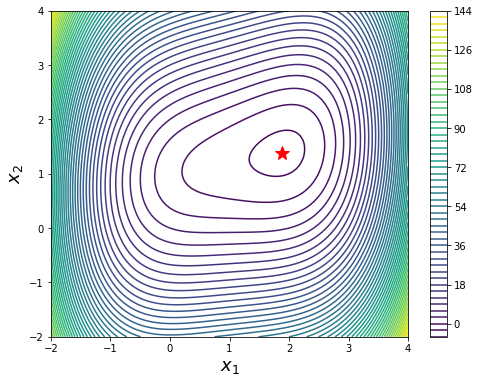

In [68]:
# a contour plot

fig, ax = plt.subplots(figsize=(8, 6))
x1 = x2 = np.linspace(-2, 4, 100)
X1, X2 = np.meshgrid(x1, x2)

# contours
c = ax.contour(X1, X2, f_lambda(X1, X2), 50)

ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)
             

---

Two popular methods are: 

---

- the BFGS **optimize.fmin_bfgs** :

Broyden–Fletcher–Goldfarb–Shanno algorithm
https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm



a quasi-Newton method that can gradually build up numerical
estimates of the Hessian, and also the gradient, if necessary. 

---

- The conjugate-gradient methods **optimize.fmin_cg** :

Conjugate_gradient_method  
https://en.wikipedia.org/wiki/Conjugate_gradient_method

is a variant
of the steepest decent method and does not use the Hessian, and it can be used with numerical estimates
of the gradient obtained from only function evaluations.

---

In [79]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


array([1.88292645, 1.37658596])

In [80]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


array([1.88292612, 1.37658523])

---

Both of these methods can also be used without providing a function for the gradient as well, but note the number of evaluations: they are way higher than before.Thus better with then given
    
---
    


In [82]:
x_opt = optimize.fmin_bfgs(f, (0, 0))
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 52
         Gradient evaluations: 13


array([1.88292644, 1.37658595])

---

**The methods for multivariate optimization that we have discussed so far all converge to a local
minimum in general. For problems with many local minima, this can easily lead to a situation when the
solver easily gets stuck in a local minimum, even if a global minimum exists.** 




### Brute Force
---

Although there is no complete
and general solution to this problem, a practical approach is 
brute force search over a coordinate grid to find a suitable starting point for an iterative solver. 

---


At least this gives a systematic approach to find a global minimum within given coordinate ranges. 


Consider the problem of minimizing the function: 

$$4 sin (\pi x) + 6 sin (\pi y) + ( x - 1 )^2 + ( y - 1 )^2,$$ 

which has a large number of local minima. 


---


This can make it tricky to pick a suitable initial point for an interative solver. To solve this optimization problem
with SciPy, we first define a Python function for the objective function:
    
    

In [85]:
slice(-3, 5, 0.5)

slice(-3, 5, 0.5)

In [86]:
def f(U):
    x, y = U
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + (x - 1)**2 + (y - 1)**2


x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5))) 
print(x_start)
f(x_start)

[1.47586865 1.48362949]


In [87]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 1
         Function evaluations: 12
         Gradient evaluations: 3


In [88]:
f(x_opt)

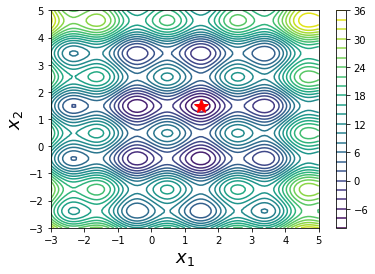

In [89]:
def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [90]:
#We could as well have used:

x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 1
         Function evaluations: 12
         Gradient evaluations: 3


In [91]:
print("x_opt:", x_opt)
print("result:", f(x_opt))

x_opt: [1.47586894 1.48365789]
result: -9.52022927305461


In [92]:
result = optimize.minimize(f, x_start, method='BFGS')
x_opt = result.x

In [93]:
print("x_opt:", x_opt)
print("result:", f(x_opt))

x_opt: [1.47586894 1.48365789]
result: -9.52022927305461


Constrained Optimizaion
---

As an example of solving a bounded optimization problem with the L-BFGS-B solver, consider
minimizing the objective function: 
$$f(x) = (x_1 - 1)^2 + (x_2 - 1)^2$$ 
subject to the constraints $$2 \leq x_1 \leq 3$$
and 
$$0 \leq x_2 \leq 2.$$

---

- Define a function for the objective functions, and tuples with the
boundaries for each of the two variables in this problem, according to the given constraints. 

- For comparison, we solve both the unconstrained and unconstrained optimization problems, and plot a contour graph of the objective function.

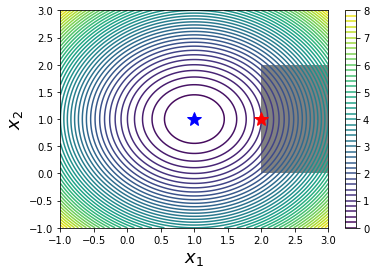

In [94]:
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2

# unconstrained optimization
x_opt = optimize.minimize(f, np.array([1, 1]), method='BFGS').x

# constrained optimization
bnd_x1, bnd_x2 = (2, 3), (0, 2)

#'L-BFGS-B limited-memory with bound constraints
x_cons_opt = optimize.minimize(f, np.array([1, 1]), 
                               method='L-BFGS-B', 
                               bounds=[bnd_x1, bnd_x2]).x

# plot function
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
# compare the two solutions
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)



# plot a feasible region (in this case it is a rectangle)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]), bnd_x1[1] - bnd_x1[0], 
                           bnd_x2[1] - bnd_x2[0], facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

**Note:**

- Constraints that are defined by equalities or inequalities that include more than one variable are more complicated to deal with. 

- For example, using the Lagrange multipliers, it is possible to convert a constrained optimization problem to an unconstrained problem by introducing additional variables.

### Linear Programming

- A much more restricted type of optimization problem

- The objective function and all constraints are linear

- Linear programming has many important applications

- Can be solved efficiently 

- A popular algorithm for this type of problems is known as simplex, which systematically moves from one vertex to another until the optimal vertex has been reached;

- Also more recent interior point methods that efficiently solve linear programming problems



**Definition**

$$ \min c^T x$$

$$s.t. Ax=b$$ 
$$x \geq 0,$$

where $c, x \in \mathbf{R}^n$, $A \in \mathbf{R}^{m n}$ and $b \in \mathbf{R}^m$.

To solve this problem, we use the **cvxopt library**, which provides the linear programming solver
**cvxopt.solvers.lp**.

The cvxopt library uses its own classes for representing matrices and vectors; to convert for numpy to cvxopt fomat: use **cvxopt.matrix**.



In [77]:
c = np.array([-1.0, 2.0, -3.0])
A = np.array([[ 1.0, 1.0, 0.0], 
              [-1.0, 3.0, 0.0], 
              [ 0.0, -1.0, 1.0]])

b = np.array([1.0, 2.0, 3.0])

A_ = cvxopt.matrix(A)
b_ = cvxopt.matrix(b)
c_ = cvxopt.matrix(c)

sol = cvxopt.solvers.lp(c_, A_, b_)

Optimal solution found.


In [78]:
sol

{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 0.0,
 'relative gap': 0.0,
 'primal objective': -10.0,
 'dual objective': -10.0,
 'primal infeasibility': 0.0,
 'primal slack': -0.0,
 'dual slack': 0.0,
 'dual infeasibility': 1.4835979218054372e-16,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 0}

In [79]:
# optimal solution
np.array(sol['x'])

array([[0.25],
       [0.75],
       [3.75]])

In [80]:
# optimal value
np.array(sol['primal objective'])

array(-10.)

A linear programming problem with thousands of variables can be solved. 
